In [1]:
import os
import gdown
HOME = os.getcwd()
print(HOME)

/content


In [2]:
#@title Подключение Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#@title Загружаем yolov8
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [6]:
#@title Загружаем датасет
!mkdir {HOME}/datasets
!gdown --fuzzy https://drive.google.com/file/d/1iKvXIjWFx03aRmqr8bM0po1JCggpOCri/view?usp=sharing
!unzip -qo Conbine_dataset_3_classes-1_80-20-10-str.zip -d /content/datasets

Downloading...
From: https://drive.google.com/uc?id=1ena1CIcTbonr09R4D1zWHlDOKVxkbs_x
To: /content/Conbine_dataset_3_classes-1_80-20-10-str.zip
100% 374M/374M [00:10<00:00, 37.2MB/s]


In [8]:
#@title Обучение модели
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/data.yaml epochs=100 imgsz=640 batch=8

/content
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/data.yaml, epochs=100, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, fo

In [10]:
#@title Создаем папку на Google Диск и копируем на него веса модели best.pt
%mkdir -p /content/drive/MyDrive/weights/
!cp /content/runs/detect/train2/weights/best.pt /content/drive/MyDrive/weights/

In [9]:
#@title Ставим дообучение
%cd {HOME}
!yolo task=detect mode=train model=/content/drive/MyDrive/weights/best.pt data=/content/datasets/data.yaml epochs=100 imgsz=640 batch=8

In [11]:
!ls {HOME}/runs/detect/train2/

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1702807183.d6da01b58b4f.2750.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	  val_batch2_pred.jpg
labels.jpg					    train_batch39420.jpg  weights
P_curve.png					    train_batch39421.jpg
PR_curve.png					    train_batch39422.jpg


/content


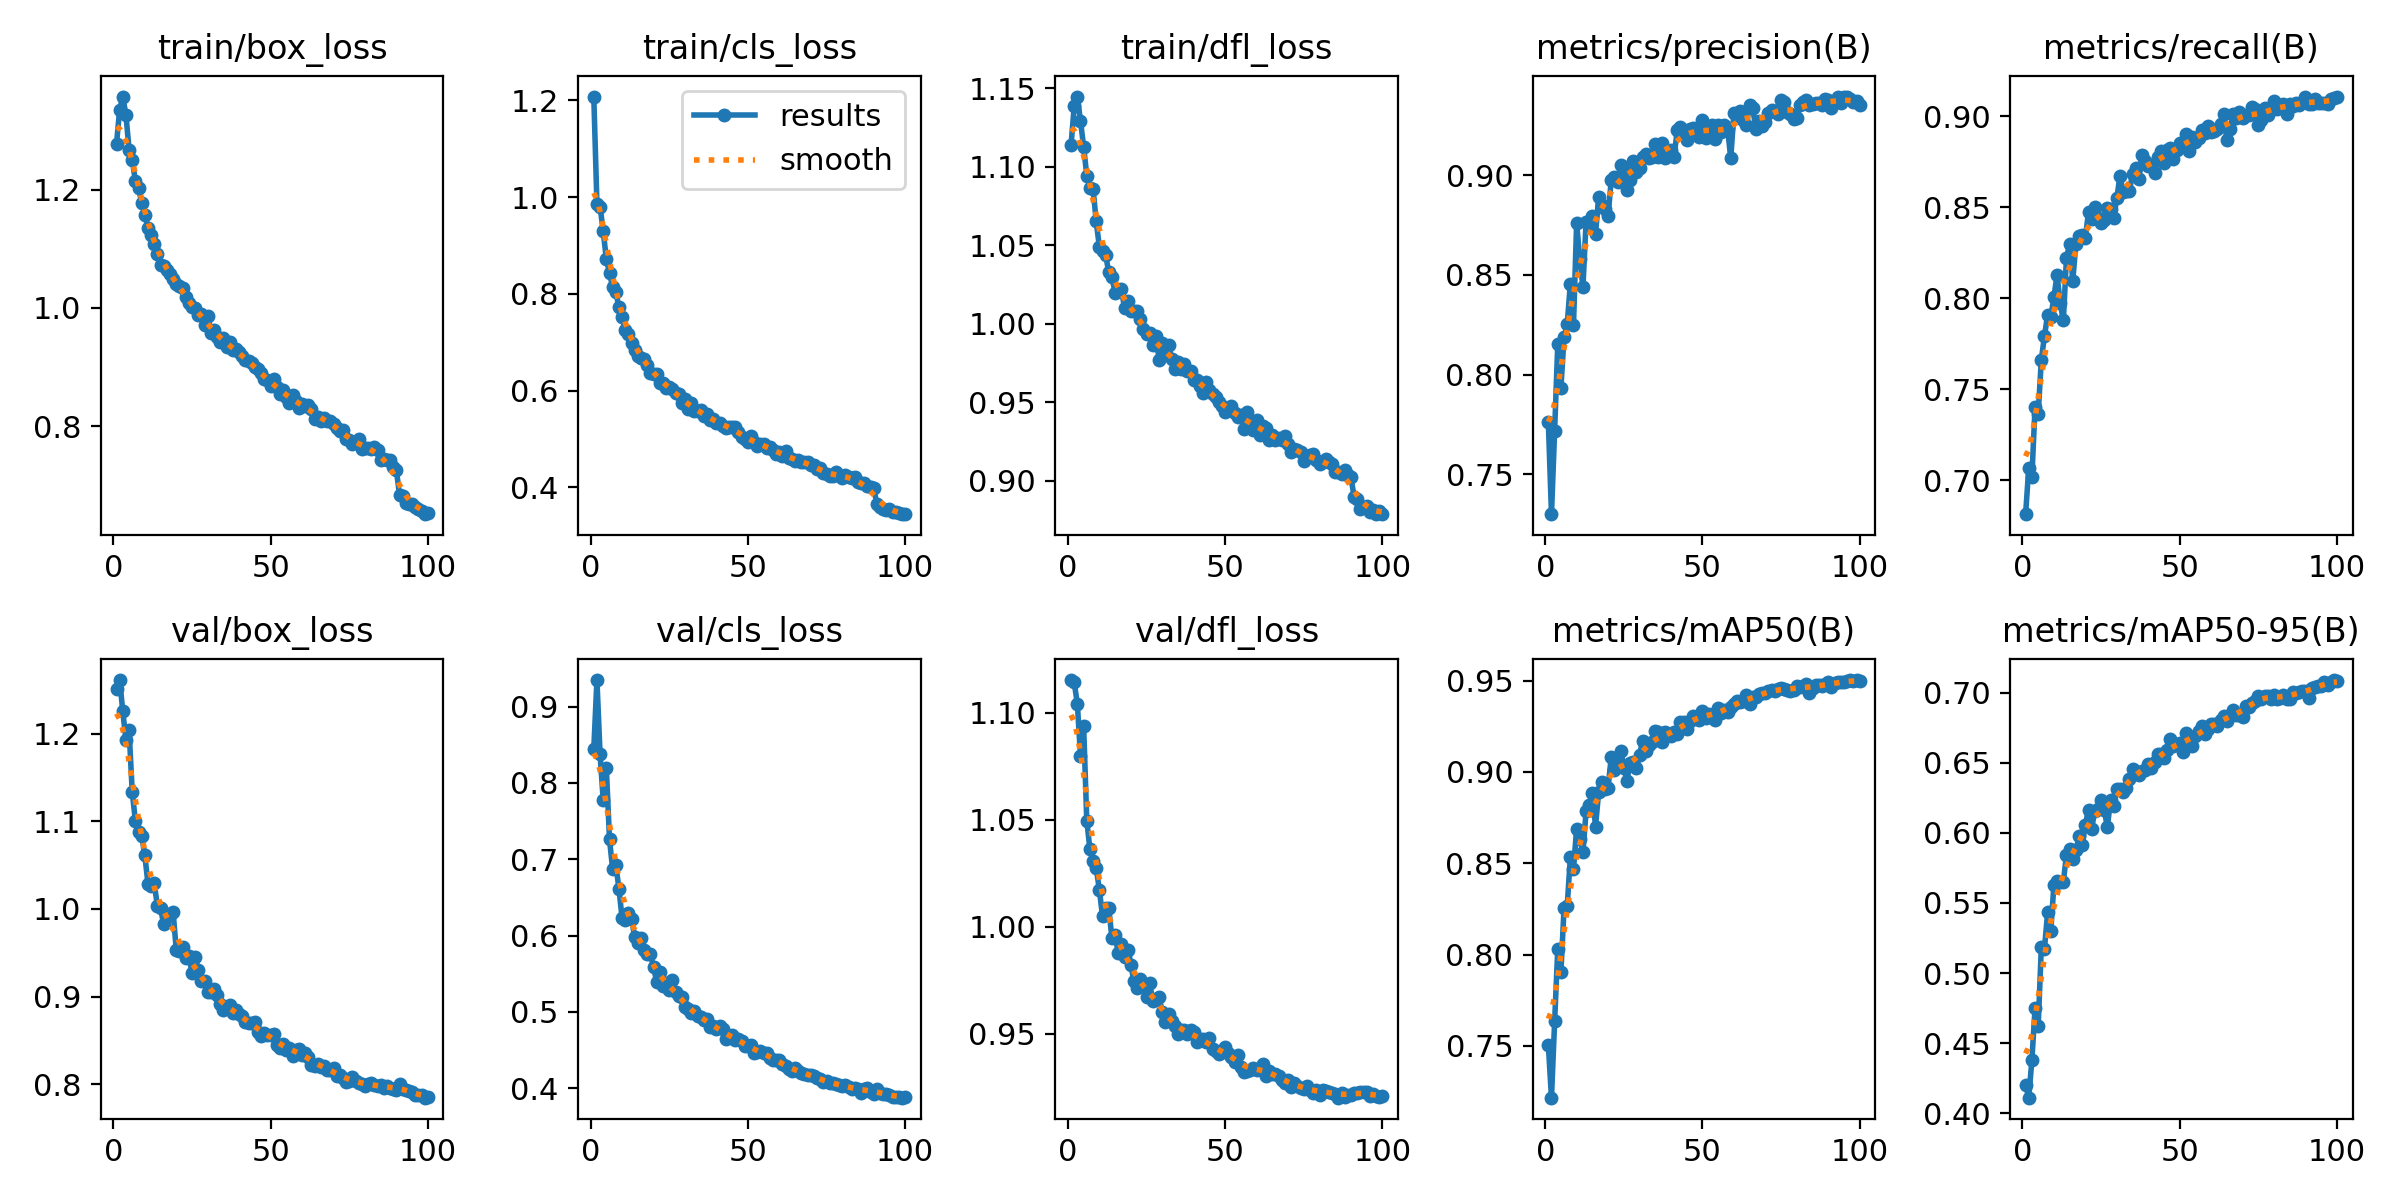

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=1000)

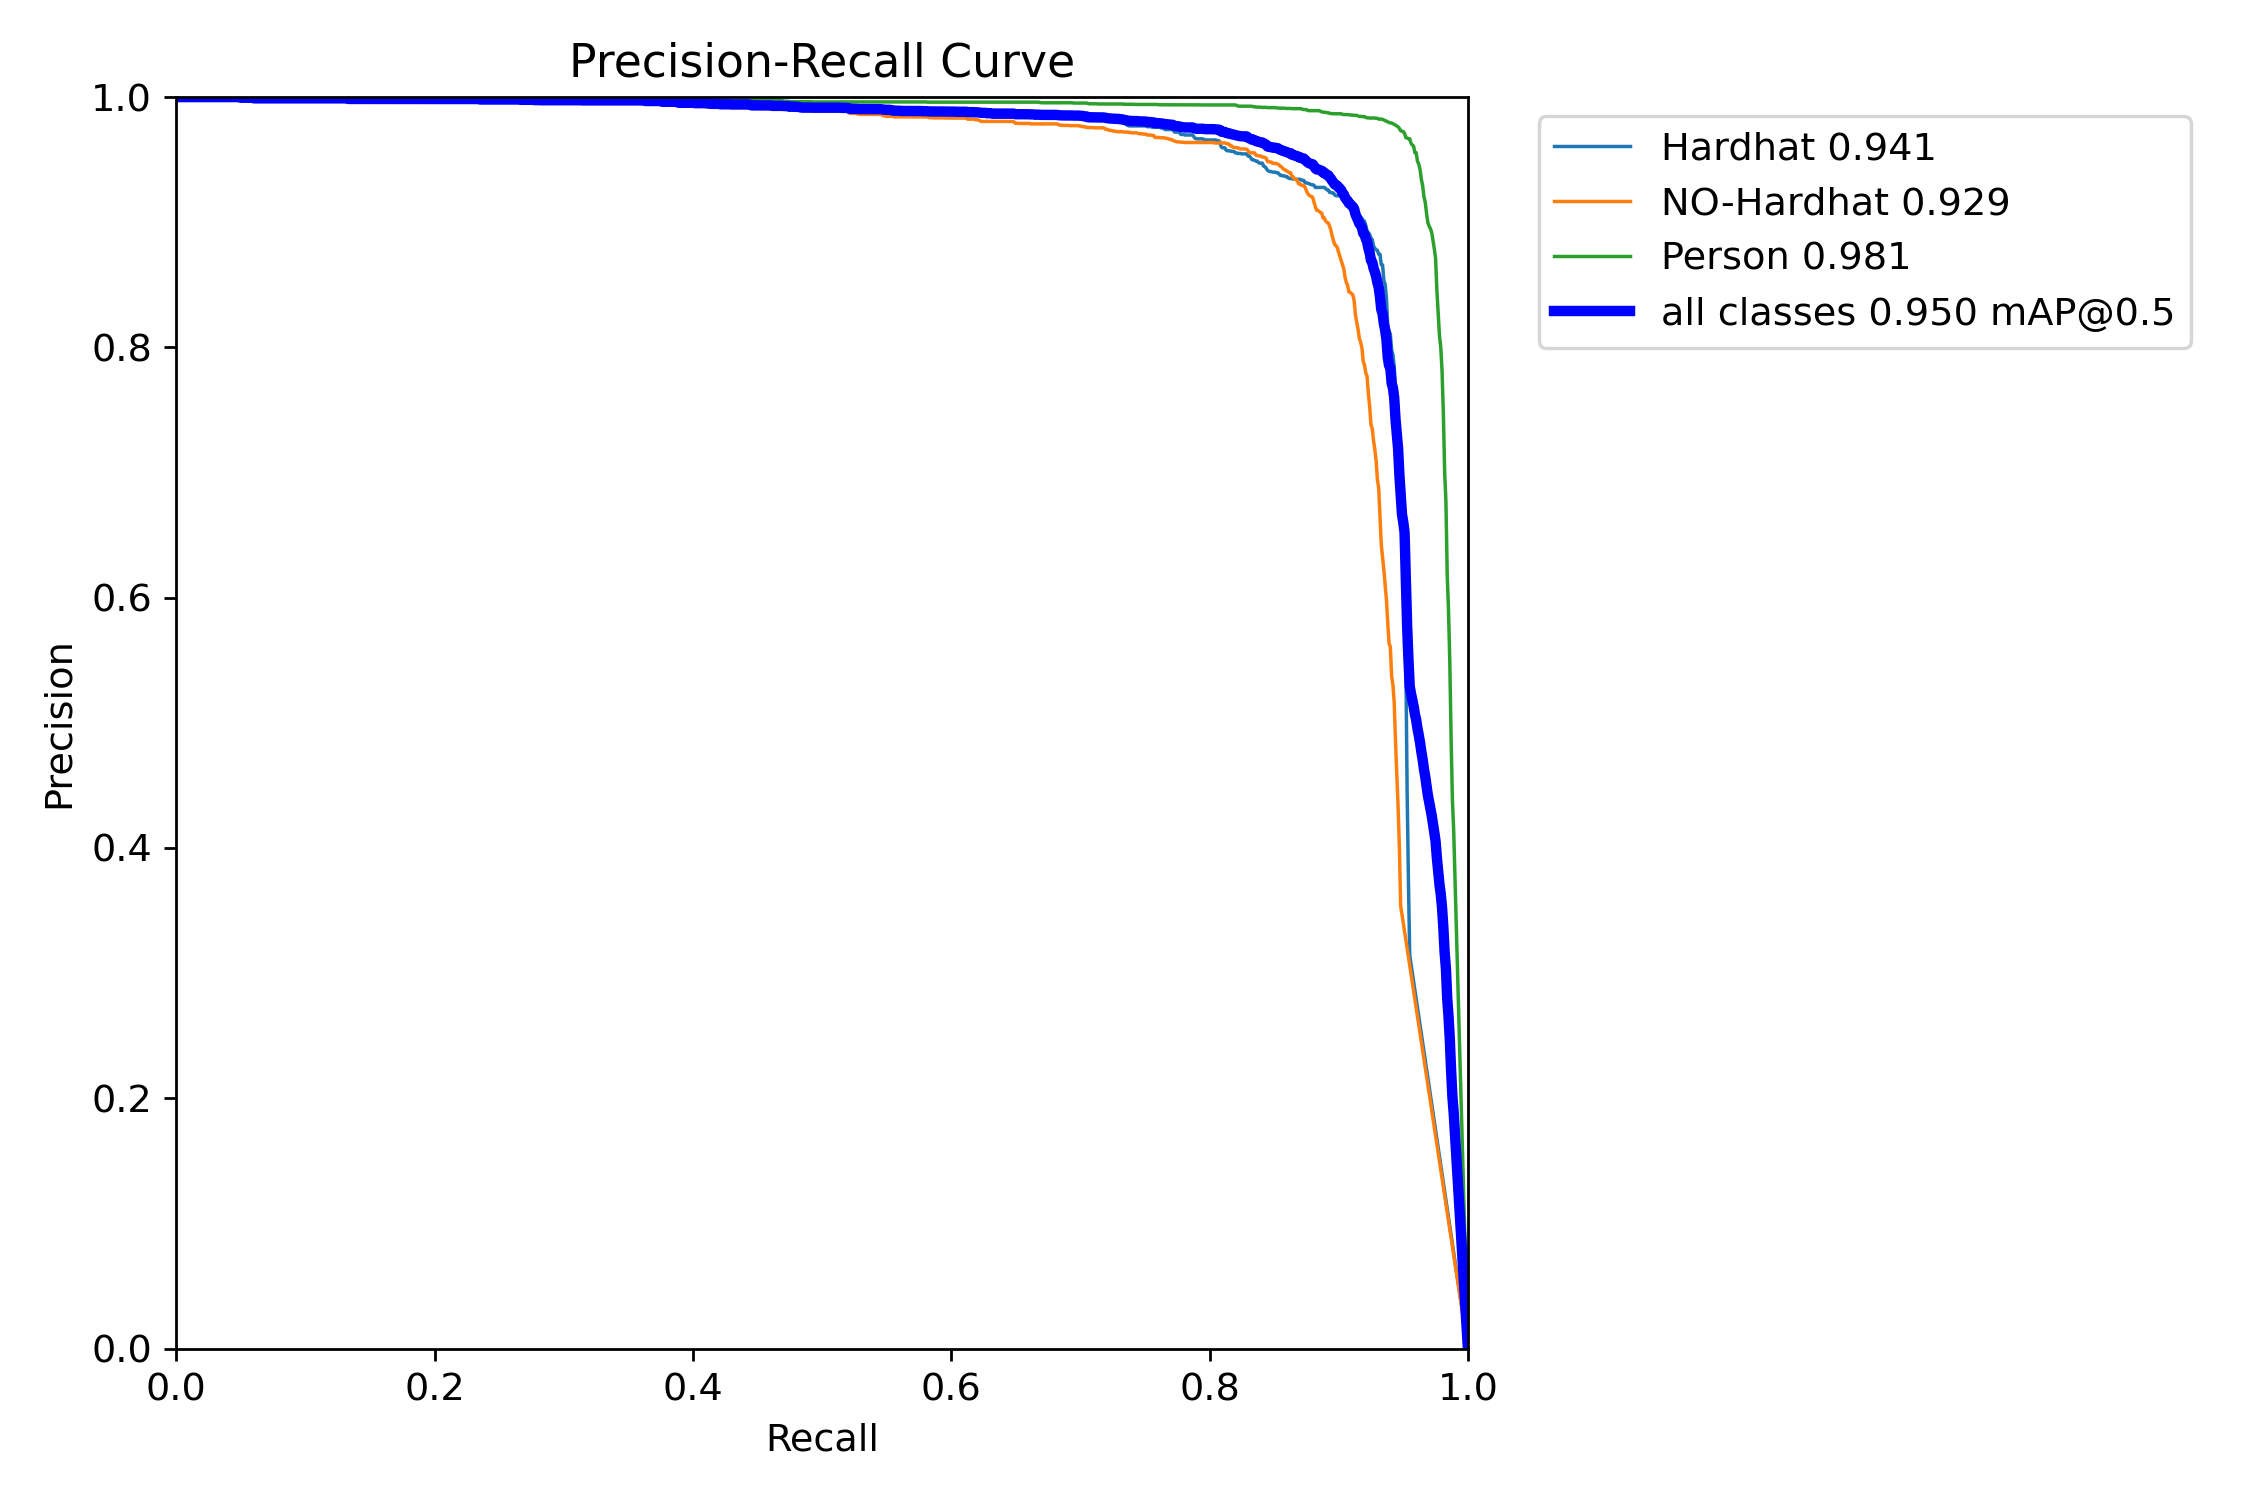

In [14]:
Image(filename=f'{HOME}/runs/detect/train2/PR_curve.png', width=1000)

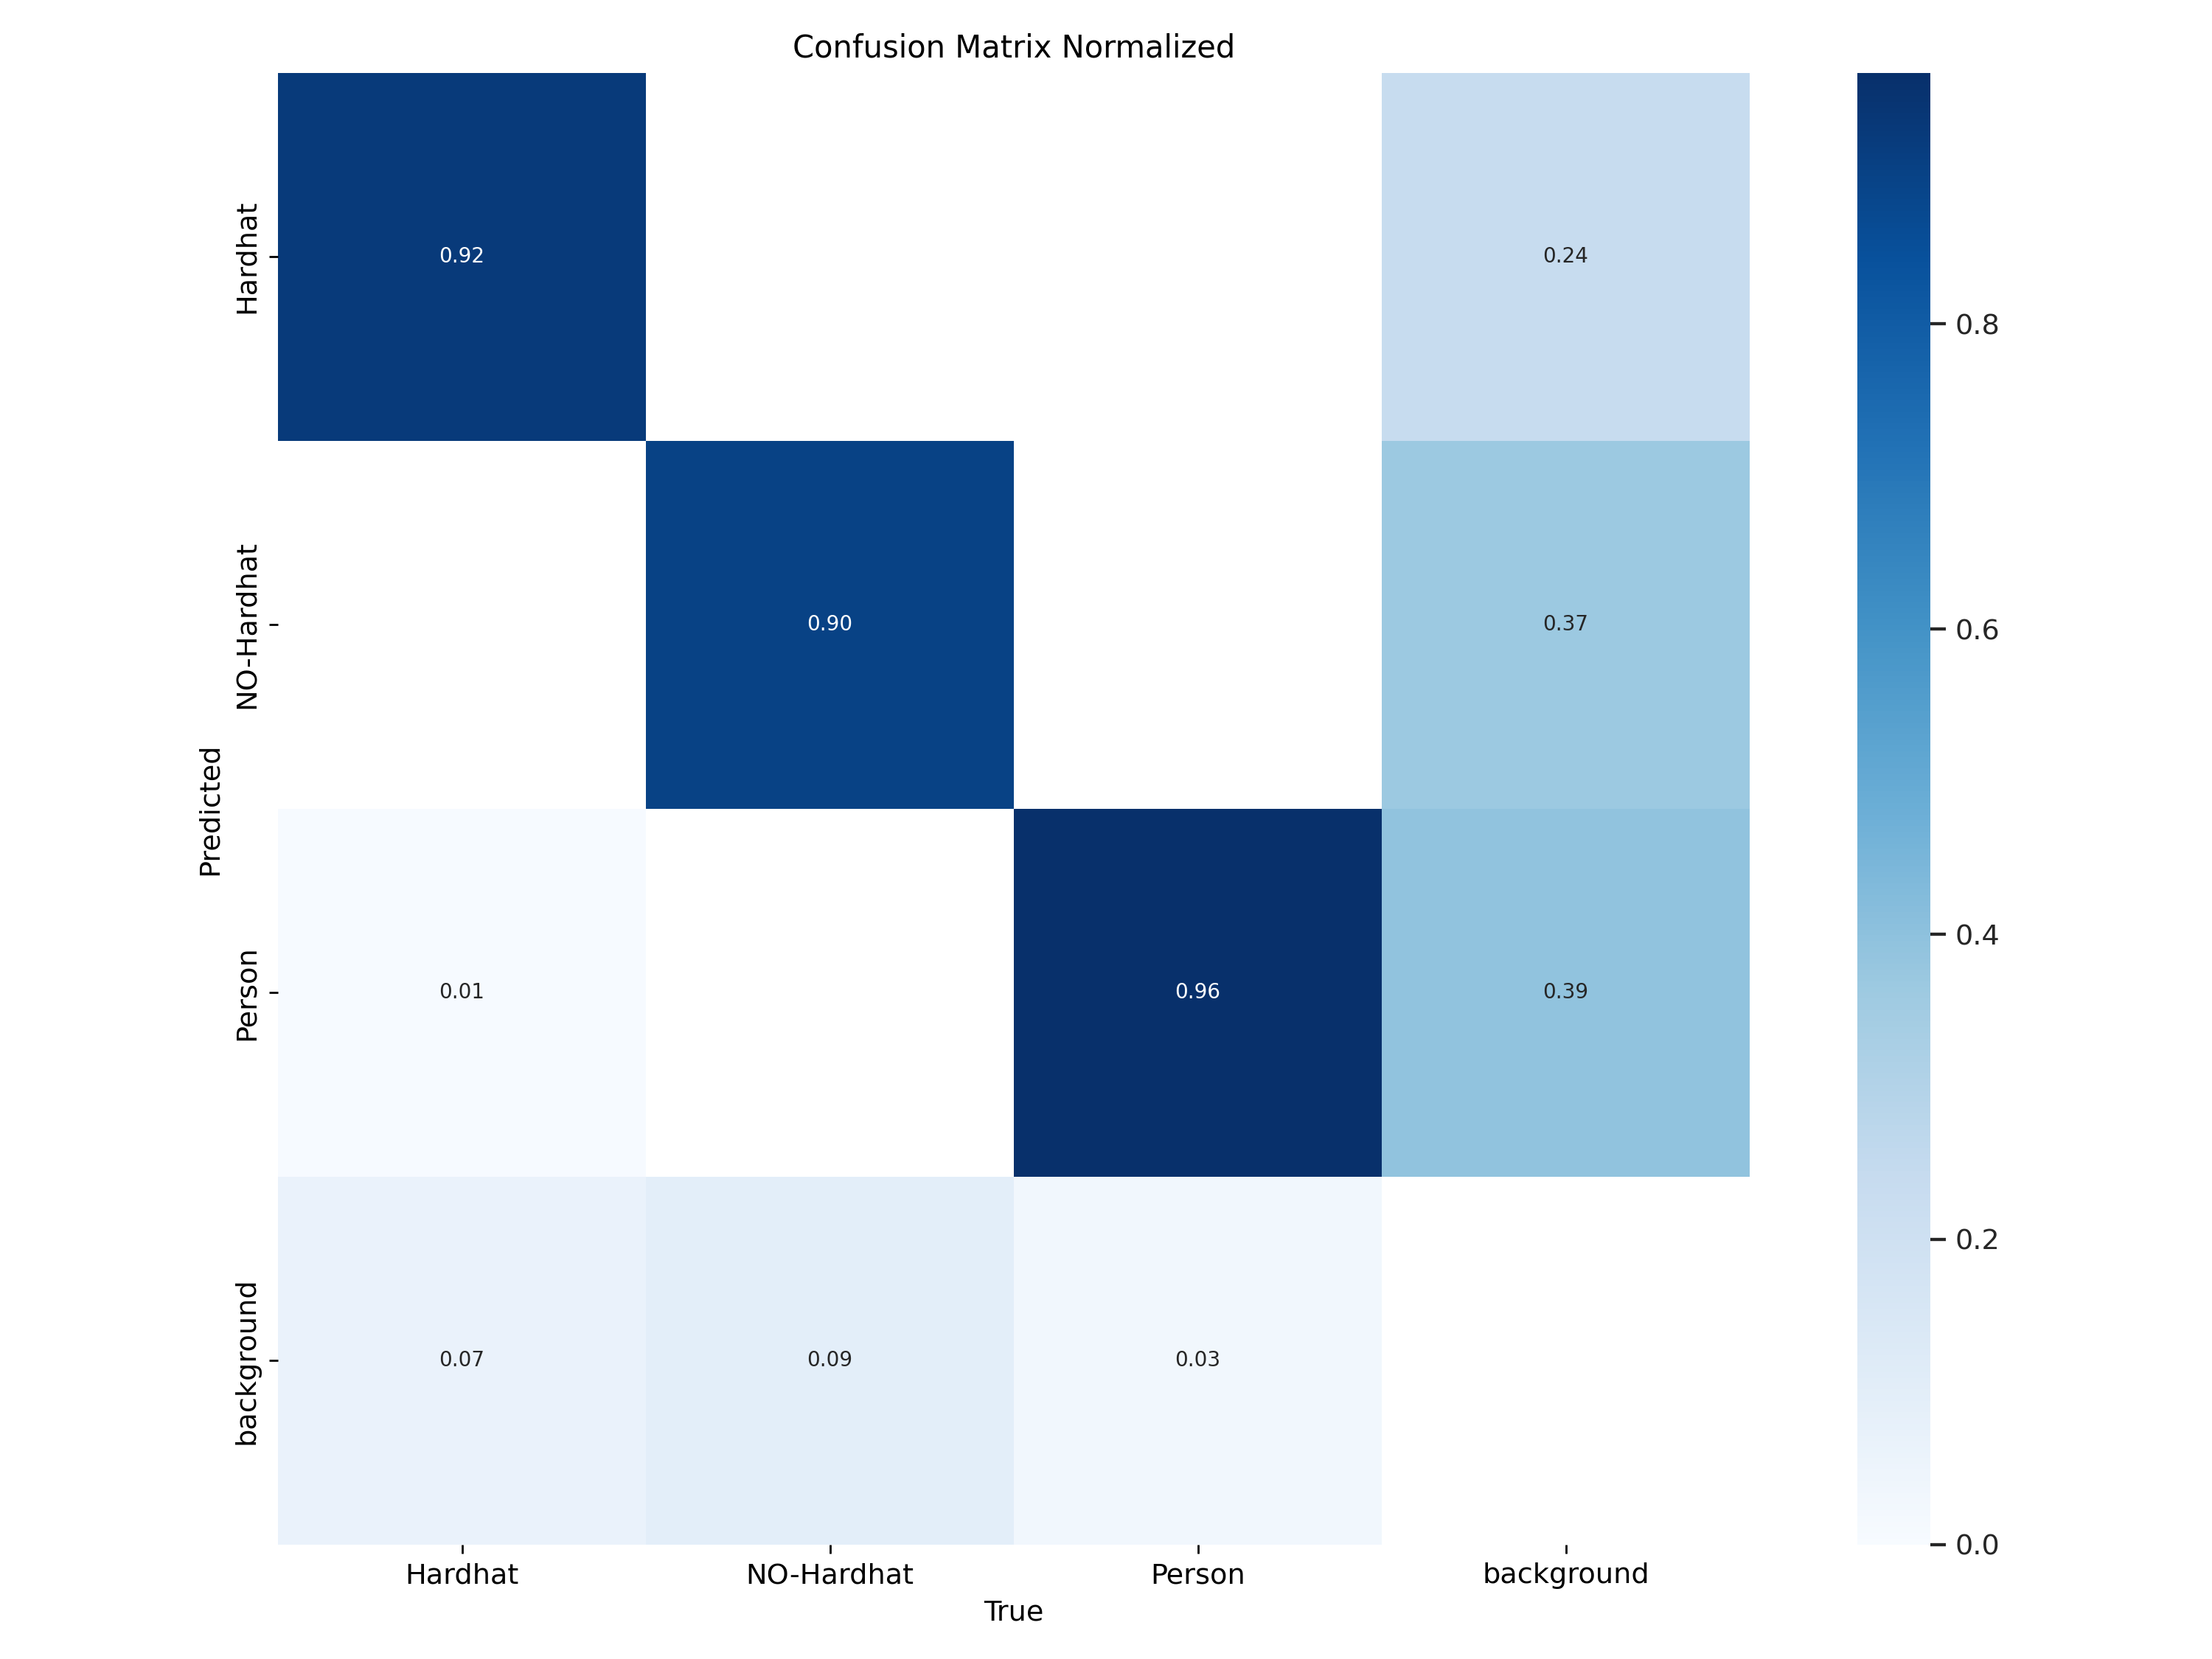

In [15]:
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix_normalized.png', width=1000)

/content


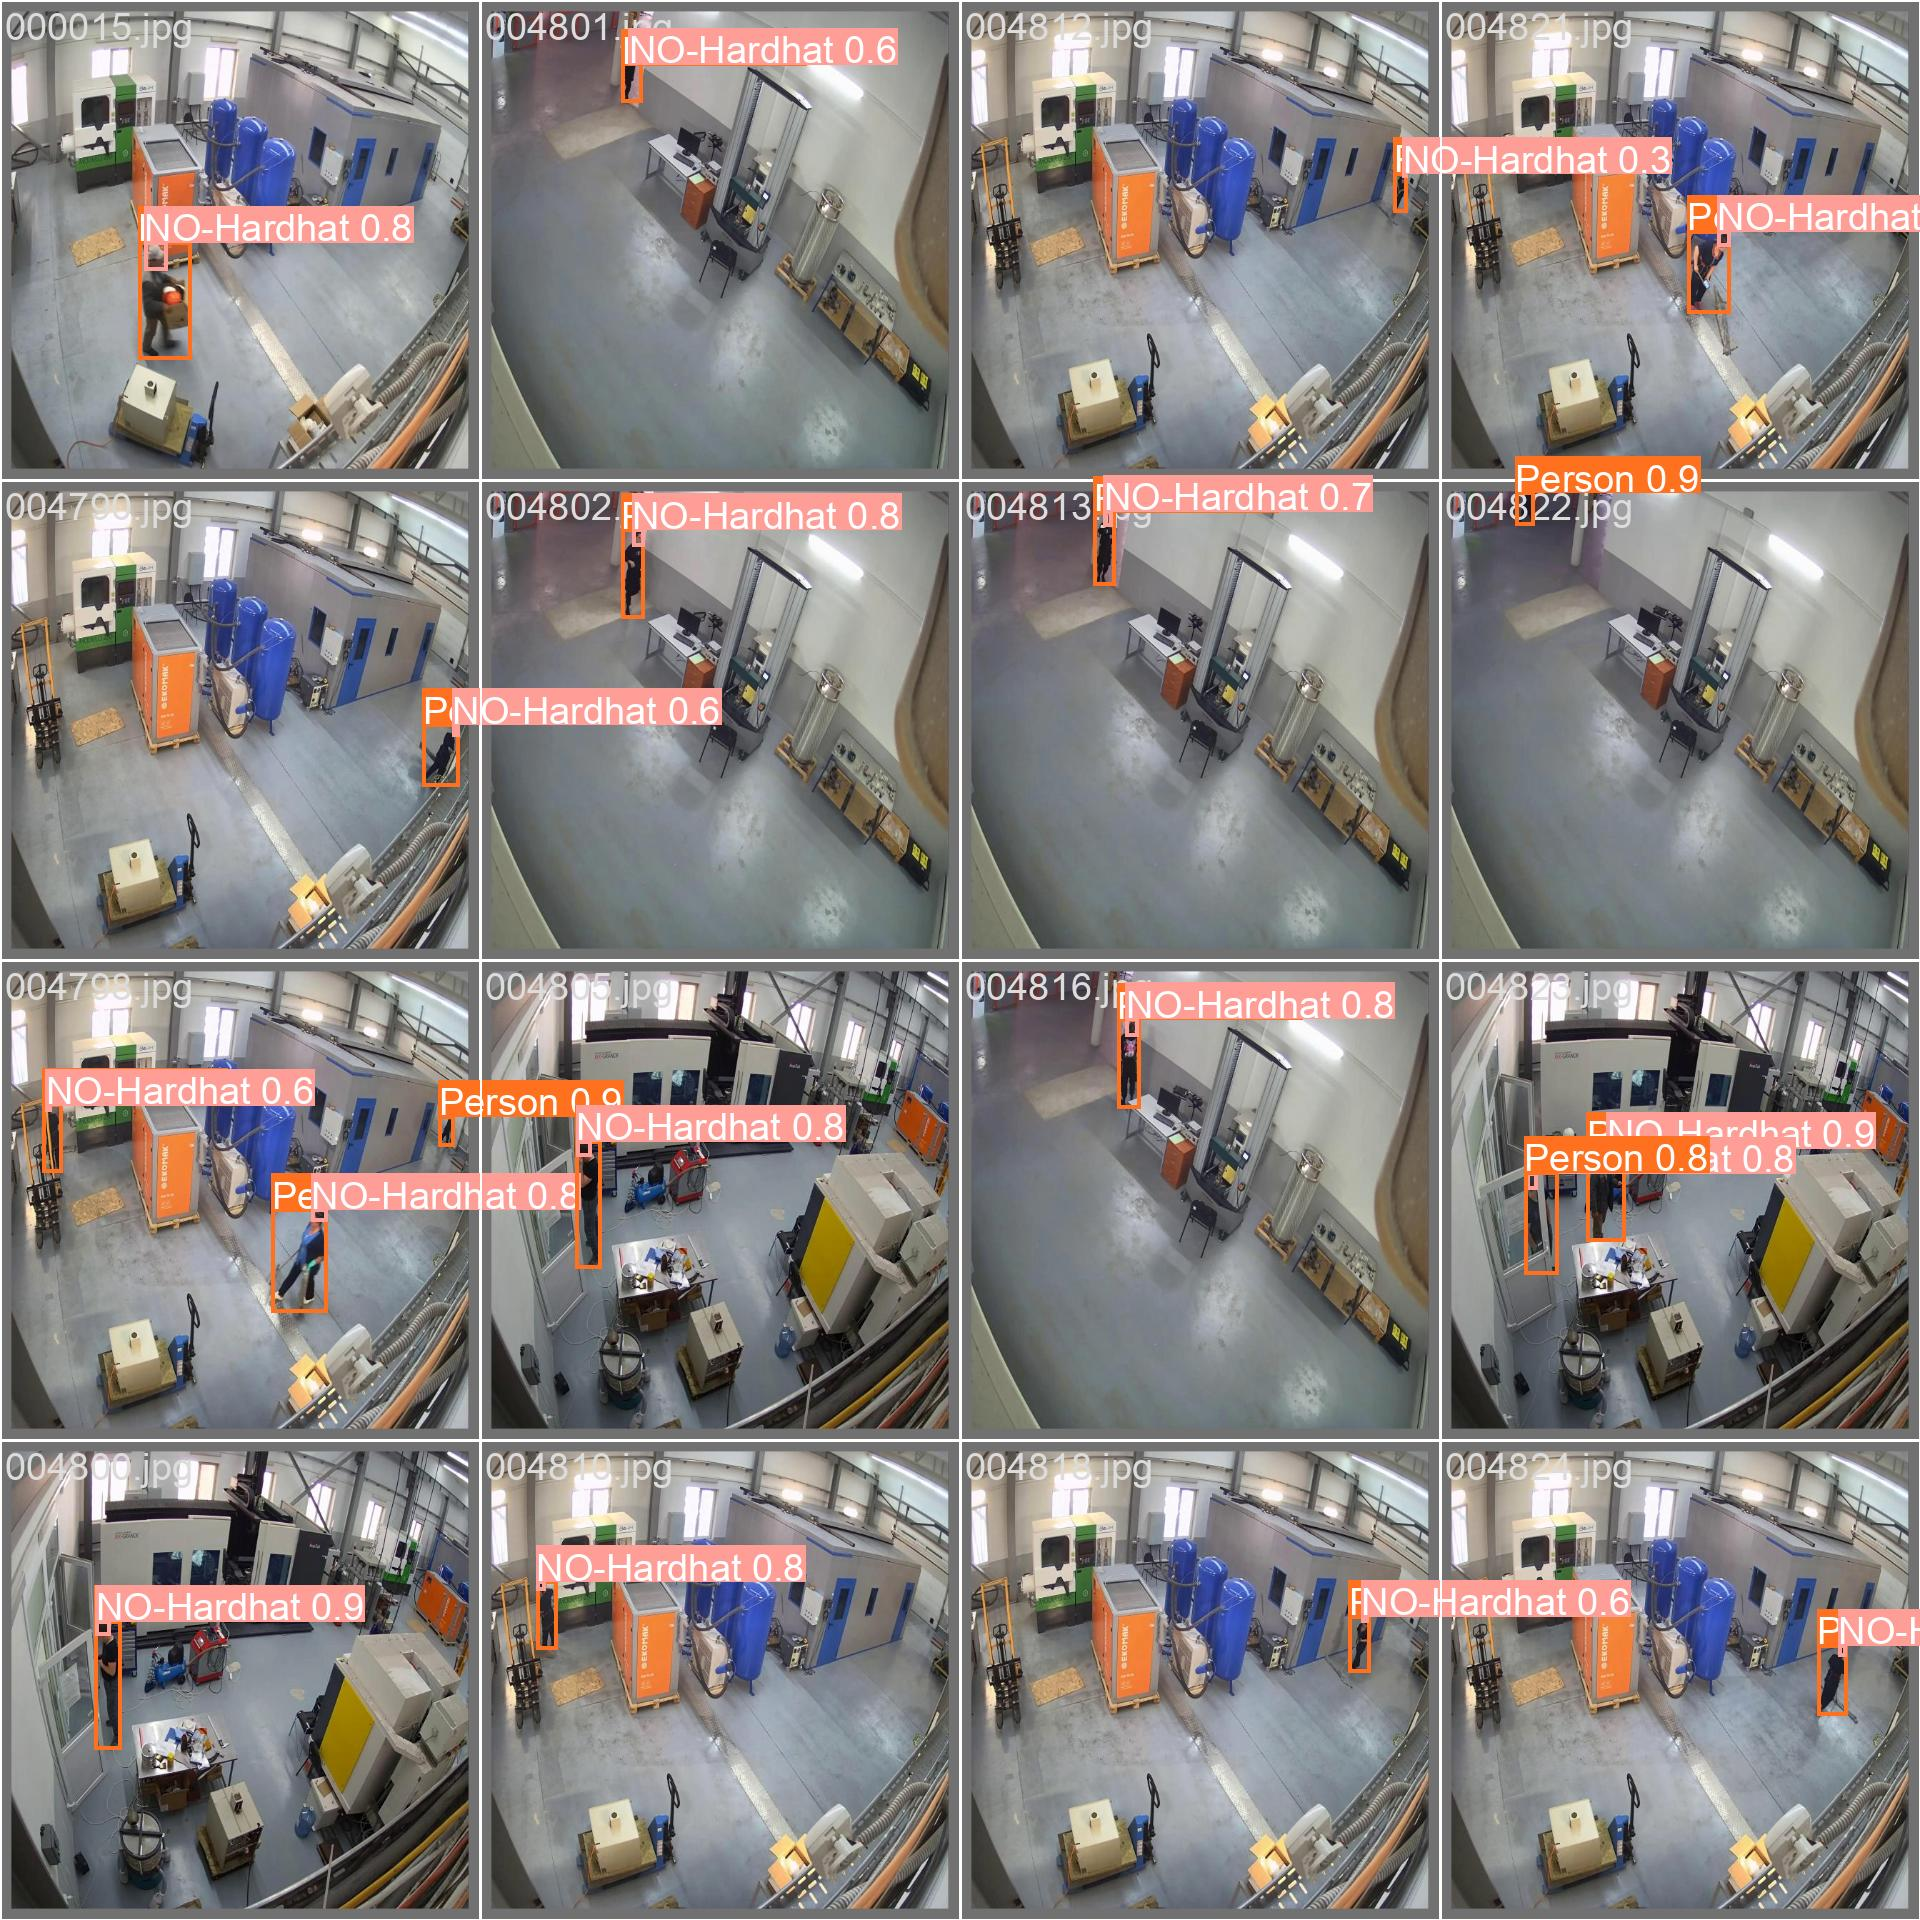

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=1000)

In [17]:
#@title Валидация
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data=/content/datasets/data.yaml

/content
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/valid/labels.cache... 2517 images, 0 backgrounds, 0 corrupt: 100% 2517/2517 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 158/158 [00:42<00:00,  3.72it/s]
                   all       2517       9054      0.936      0.911      0.951       0.71
               Hardhat       2517       1749      0.917      0.906      0.942       0.69
            NO-Hardhat       2517       2877      0.932       0.87       0.93      0.598
                Person       2517       4428       0.96      0.958      0.981      0.843
Speed: 0.4ms preprocess, 8.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [18]:
#@title Предсказание модели на обученных данных
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/content/datasets/test/images save=True

/content
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1236 /content/datasets/test/images/000003.jpg: 640x640 1 NO-Hardhat, 1 Person, 26.9ms
image 2/1236 /content/datasets/test/images/000009.jpg: 640x640 1 NO-Hardhat, 1 Person, 16.4ms
image 3/1236 /content/datasets/test/images/000010.jpg: 640x640 2 NO-Hardhats, 2 Persons, 16.3ms
image 4/1236 /content/datasets/test/images/000012.jpg: 640x640 1 NO-Hardhat, 1 Person, 16.4ms
image 5/1236 /content/datasets/test/images/000023.jpg: 640x640 1 Hardhat, 4 NO-Hardhats, 4 Persons, 16.4ms
image 6/1236 /content/datasets/test/images/000024.jpg: 640x640 2 NO-Hardhats, 3 Persons, 16.3ms
image 7/1236 /content/datasets/test/images/000027.jpg: 640x640 1 NO-Hardhat, 1 Person, 16.2ms
image 8/1236 /content/datasets/test/images/000029.jpg: 640x640 1 Hardhat, 4 NO-Hardhats, 4 Persons, 16.3

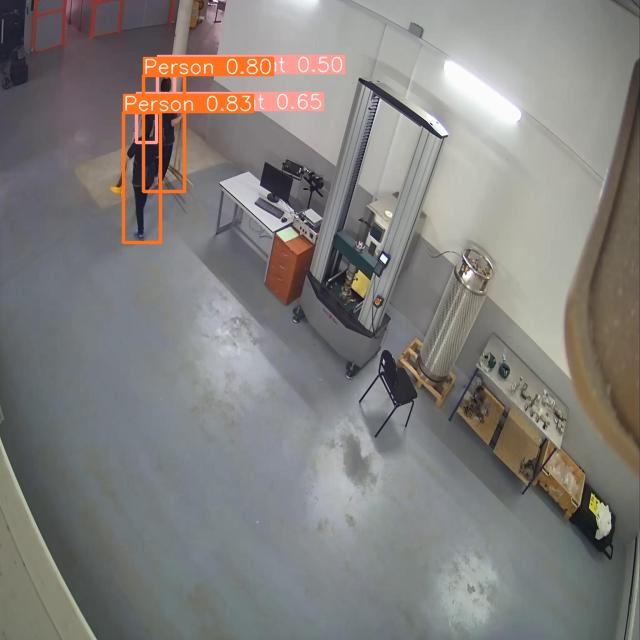

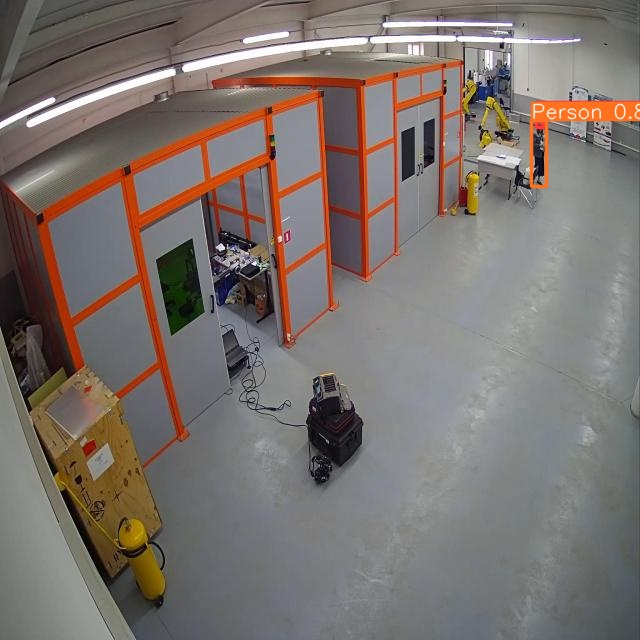

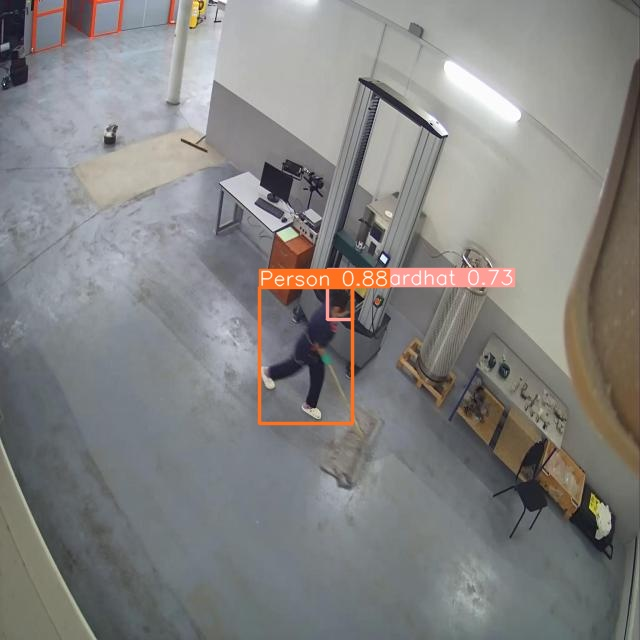

In [20]:
#@title Подгружаем предсказанные изображения
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=1000))
      print("\n")